## 단순 1차 회귀

간단한 회귀 함수를 만들어본다.

In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression

x = np.array([[0.0], [1.0], [2.0]])
y = np.array([1.0, 2.0, 2.9])

In [3]:
lm = LinearRegression()
lm.fit(x, y)

print(lm)

LinearRegression()


In [4]:
# coef_ 는 기울기 이고,
# intercept_ 는 y-절편.
print(lm.coef_, lm.intercept_)

[0.95] 1.016666666666667


## 2차 다항식 설정

In [5]:
import numpy as np
import numpy.random as rnd

# 그림을 그려주기 위한 설정
%matplotlib inline
import matplotlib.pyplot as plt

### 랜덤 데이터 생성

In [6]:
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1) 

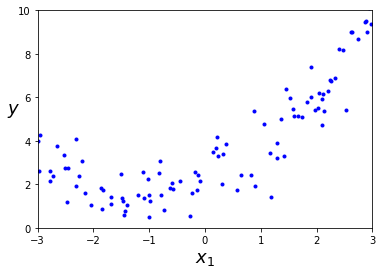

In [7]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

### 다항식 변환

In [8]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# 우리는 PolynomialFeatures()를 통해서 1차원의 데이터로 부터 2차원의 데이터를 생성할 예정임
poly_features = PolynomialFeatures(degree=2, include_bias=False)

X_poly = poly_features.fit_transform(X)

In [9]:
len(X_poly)

100

In [10]:
X[0]

array([2.91032819])

In [11]:
X_poly[0]

array([2.91032819, 8.47001017])

In [12]:
## Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression()

In [13]:
lin_reg.intercept_, lin_reg.coef_

(array([2.14289394]), array([[1.03982324, 0.47903883]]))

### Regression 그림 그리기 (참고)

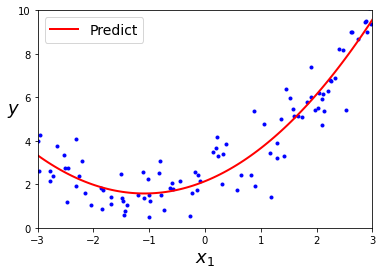

In [14]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predict")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()